**Ladder Scheme and Microtubule Statistical Models**

In [1]:
# import necessary libraries

import numpy as np
import matplotlib.pyplot as plt
import random

**Ladder Scheme Statistical Model**

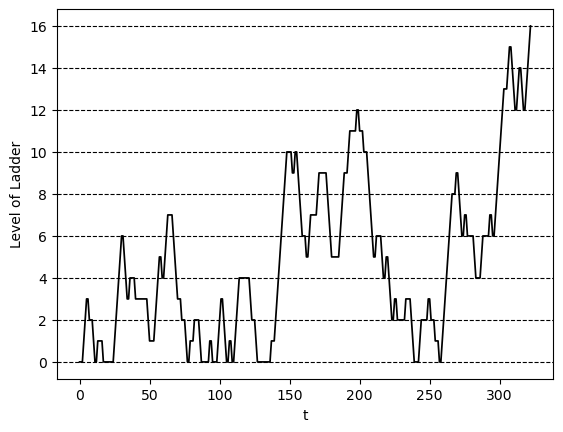

In [ ]:
# stop when the reaction gets to the 16th rung, signifying the product
desired_product = 16

# start ladder on the top rail, and the height at zero
ladder_state = [1]
height = [0]

# probabilities
c_s = 0.51
r = 0.49

# two different functions: one for the top rail, one for the bottom rail; within the function, add to the ladder or subtract from the ladder
i = 1
while (height[i-1] < desired_product):
    
    # 1 if on the top rail
    if (ladder_state[i-1] == 1):
        if (random.random() < (1-c_s)):
            new = height[i-1] + 1
            height.append(new)
            ladder_state.append(1)
            i += 1
        else:
            height.append(height[i-1])
            ladder_state.append(0)
            i += 1

    # 0 if on the bottom rail
    if (ladder_state[i-1] == 0):
        if (random.random() < (1-r)):
            new2 = height[i-1] - 1

            # if the state returns to 0, then go back to the top rail (since at 0, only palce to go is to the top in S model)
            if (new2 < 0):
                height.append(0)
                ladder_state.append(1)
            else:
                height.append(new2)
                ladder_state.append(0)
            i += 1

        else:
            height.append(height[i-1])
            ladder_state.append(1)
            i += 1

    if (height[i-1] < 0):
        height[i-1] = 0

    if (height[i-1] >= desired_product):
        break

time = np.arange(len(height))

plt.plot(time,height,linewidth=1.25,color='0')
plt.ylabel("Level of Ladder")
plt.xlabel("t")
plt.grid(axis='y',linestyle='--',color='0')
plt.show()

**Microtubule Statistical Model**

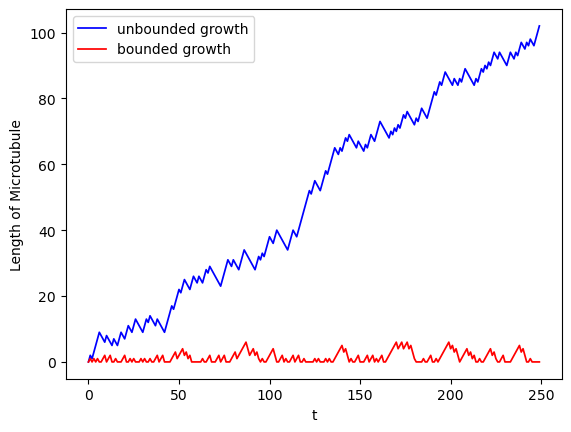

In [3]:
t_max = 250

## BOUNDED

# resultant length and states of growth/shrinkage
res_un_length = [0]
res_un_growth_state = [1]

res_bound_length = [0]
res_bound_growth_state = [1]

# note: v in units of grotwh per unit of time

def simulation(length,growth_state,v_g,v_s,f_cat,f_res):
    i = 1
    while (i < t_max):

        # growth state
        if (growth_state[i-1] == 1):
        
            # probability of f_cat of switching to shrinking
            if (random.random() > f_cat):
                new = length[i-1] + v_g
                length.append(new)
                growth_state.append(1)
                i += 1
            
            # shrink, then switch to chance of growing again
            else:
                new2 = length[i-1] - v_s
                if (new2 < 0):
                    length.append(0)
                else:
                    length.append(new2)
                growth_state.append(0)
                i += 1

        # shrinking state
        if (growth_state[i-1] == 0):

            # probability of continuing to shrink
            if (random.random() > f_res):
                new3 = length[i-1] - v_s
                if (new3 < 0):
                    length.append(0)
                else:
                    length.append(new3)
                growth_state.append(0)
                i += 1
            
            # grow, then switch to chance of shrinking again
            else:
                new4 = length[i-1] + v_g
                length.append(new4)
                growth_state.append(1)
                i += 1
    return length

unbounded_growth = simulation(res_un_length,res_un_growth_state,2,1,0.5,0.5)
bounded_growth = simulation(res_bound_length,res_bound_growth_state,1,2,0.5,0.5)

plt.plot(np.arange(0,len(unbounded_growth)),unbounded_growth,linewidth=1.25,color='b',label="unbounded growth")
plt.plot(np.arange(0,len(bounded_growth)),bounded_growth,linewidth=1.25,color='r',label="bounded growth")
plt.ylabel("Length of Microtubule")
plt.xlabel("t")
plt.legend()
plt.show()